In [49]:
!pip install scikit-learn pandas

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
sentences = [
    "Eleven, are you okay?",
    "Mike, we need to find Will.",
    "The Demogorgon is coming!",
    "Hopper, what's the plan?",
    "Dustin, where's your compass?",
    "Lucas, cover me!",
    "Joyce, I believe you.",
    "Nancy, stay close.",
    "Steve, grab the bat!",
    "Jonathan, take the shot!",
    "Max, watch out!",
    "Billy, don't do this.",
    "Robin, can you crack the code?",
    "Erica, you're a genius!",
    "Murray, we need your help.",
    "Dr. Owens, what is this place?",
    "Bob, you're a hero.",
    "Karen, keep the kids safe.",
    "Ted, listen to Joyce.",
    "Claudia, stay inside.",
    "Suzie, do you copy?",
    "Mr. Clarke, explain the Upside Down.",
    "Tommy, get the car ready.",
    "Heather, are you alright?",
    "Alexei, tell us everything."
]

labels = [
    'positive', 'positive', 'negative', 'positive', 'negative',
    'negative', 'positive', 'positive', 'negative', 'negative',
    'negative', 'negative', 'positive', 'positive', 'positive',
    'negative', 'positive', 'positive', 'negative', 'negative',
    'positive', 'negative', 'negative', 'negative', 'negative'
]

data = pd.DataFrame({'text': sentences, 'label': labels})

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['text'])
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [54]:
def classify_sentence(sentence):
    sentence_transformed = vectorizer.transform([sentence])
    prediction = model.predict(sentence_transformed)
    return prediction[0]

In [62]:
# User input
user_input = "Bob, you're a hero."
classification_result = classify_sentence(user_input)
print(f"The sentence '{user_input}' is classified as '{classification_result}'.")

The sentence 'Bob, you're a hero.' is classified as 'positive'.


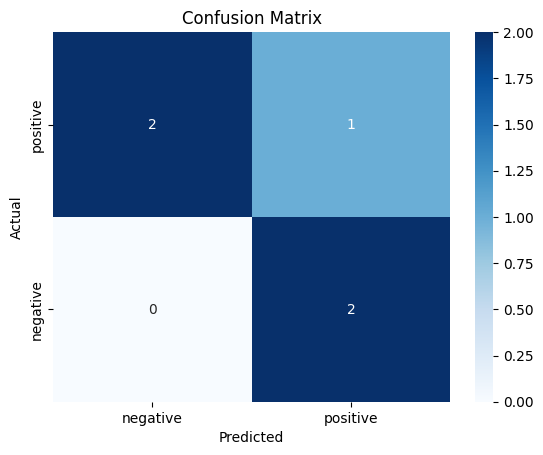

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8
              precision    recall  f1-score   support

    negative       1.00      0.67      0.80         3
    positive       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



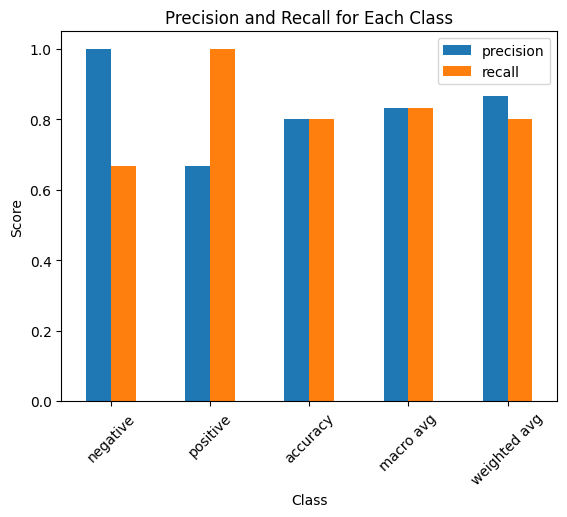

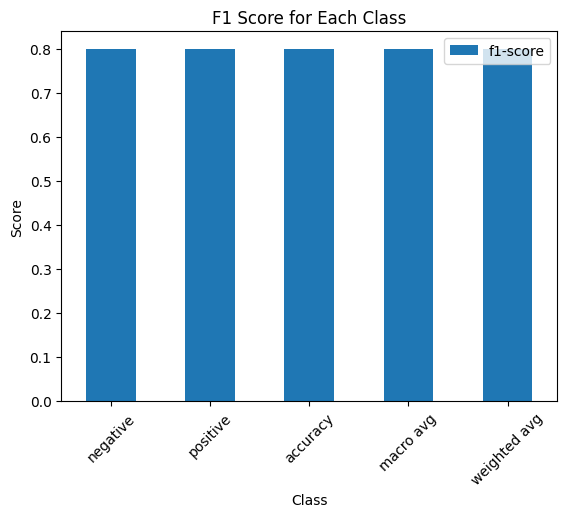

In [60]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall']].plot(kind='bar')
plt.title('Precision and Recall for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

df_report[['f1-score']].plot(kind='bar')
plt.title('F1 Score for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()